In [ ]:
import sys

sys.path.append("../")

In [30]:
from pathlib import Path

import pandas as pd
import seaborn as sns
import lightning as pl
import torch

from pmseq.canarygan.inception.train import LightningSyllableClassifier
from pmseq.canarygan.dataset import Canary16kDataModule

sns.set_style("darkgrid")

In [14]:
dm = Canary16kDataModule(
        "../data/training-dataset/",
        batch_size=32,
        with_classes=True,
        num_workers=12,
        split=True,
)

In [13]:
ckpts = sorted(Path("../checkpoints/inception/top5").glob("*.ckpt"))
ckpts

[PosixPath('../checkpoints/inception/top5/top_epoch_207-step_05200-loss_0.000-val_acc_0.99.ckpt'),
 PosixPath('../checkpoints/inception/top5/top_epoch_224-step_05625-loss_0.000-val_acc_0.99.ckpt'),
 PosixPath('../checkpoints/inception/top5/top_epoch_442-step_11075-loss_0.000-val_acc_0.99.ckpt'),
 PosixPath('../checkpoints/inception/top5/top_epoch_629-step_15750-loss_0.000-val_acc_0.99.ckpt'),
 PosixPath('../checkpoints/inception/top5/top_epoch_708-step_17725-loss_0.000-val_acc_0.99.ckpt')]

In [15]:
scores = {}
for ckpt in ckpts:
    model = LightningSyllableClassifier.load_from_checkpoint(ckpt)

    tester = pl.Trainer(
        accelerator="auto",
        devices=1,  # Lightning warning: test on only 1 device to avoid duplicata
        num_nodes=1,
        strategy="auto",
    )

    scores[str(ckpt)] = tester.test(model, dm)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.9787499904632568     │
│          test_f1          │    0.9787499904632568     │
│         test_loss         │    0.1498066931962967     │
└───────────────────────────┴───────────────────────────┘

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │     0.981249988079071     │
│          test_f1          │     0.981249988079071     │
│         test_loss         │    0.13289852440357208    │
└───────────────────────────┴───────────────────────────┘

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │         0.984375          │
│          test_f1          │         0.984375          │
│         test_loss         │    0.10249404609203339    │
└───────────────────────────┴───────────────────────────┘

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.9850000143051147     │
│          test_f1          │    0.9850000143051147     │
│         test_loss         │    0.07764076441526413    │
└───────────────────────────┴───────────────────────────┘

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.9793750047683716     │
│          test_f1          │    0.9793750047683716     │
│         test_loss         │    0.12926842272281647    │
└───────────────────────────┴───────────────────────────┘

In [35]:
df = pd.DataFrame({k: v[0] for k, v in scores.items()}).T.reset_index()
df["epoch"] = df["index"].apply(lambda x: Path(x).stem.split("_")[2].split("-")[0])
df

,index,test_loss,test_acc,test_f1,epoch
0,../checkpoints/inception/top5/top_epoch_207-st...,0.149807,0.978750,0.978750,207
1,../checkpoints/inception/top5/top_epoch_224-st...,0.132899,0.981250,0.981250,224
2,../checkpoints/inception/top5/top_epoch_442-st...,0.102494,0.984375,0.984375,442
3,../checkpoints/inception/top5/top_epoch_629-st...,0.077641,0.985000,0.985000,629
4,../checkpoints/inception/top5/top_epoch_708-st...,0.129268,0.979375,0.979375,708


<Axes: xlabel='epoch', ylabel='test_acc'>

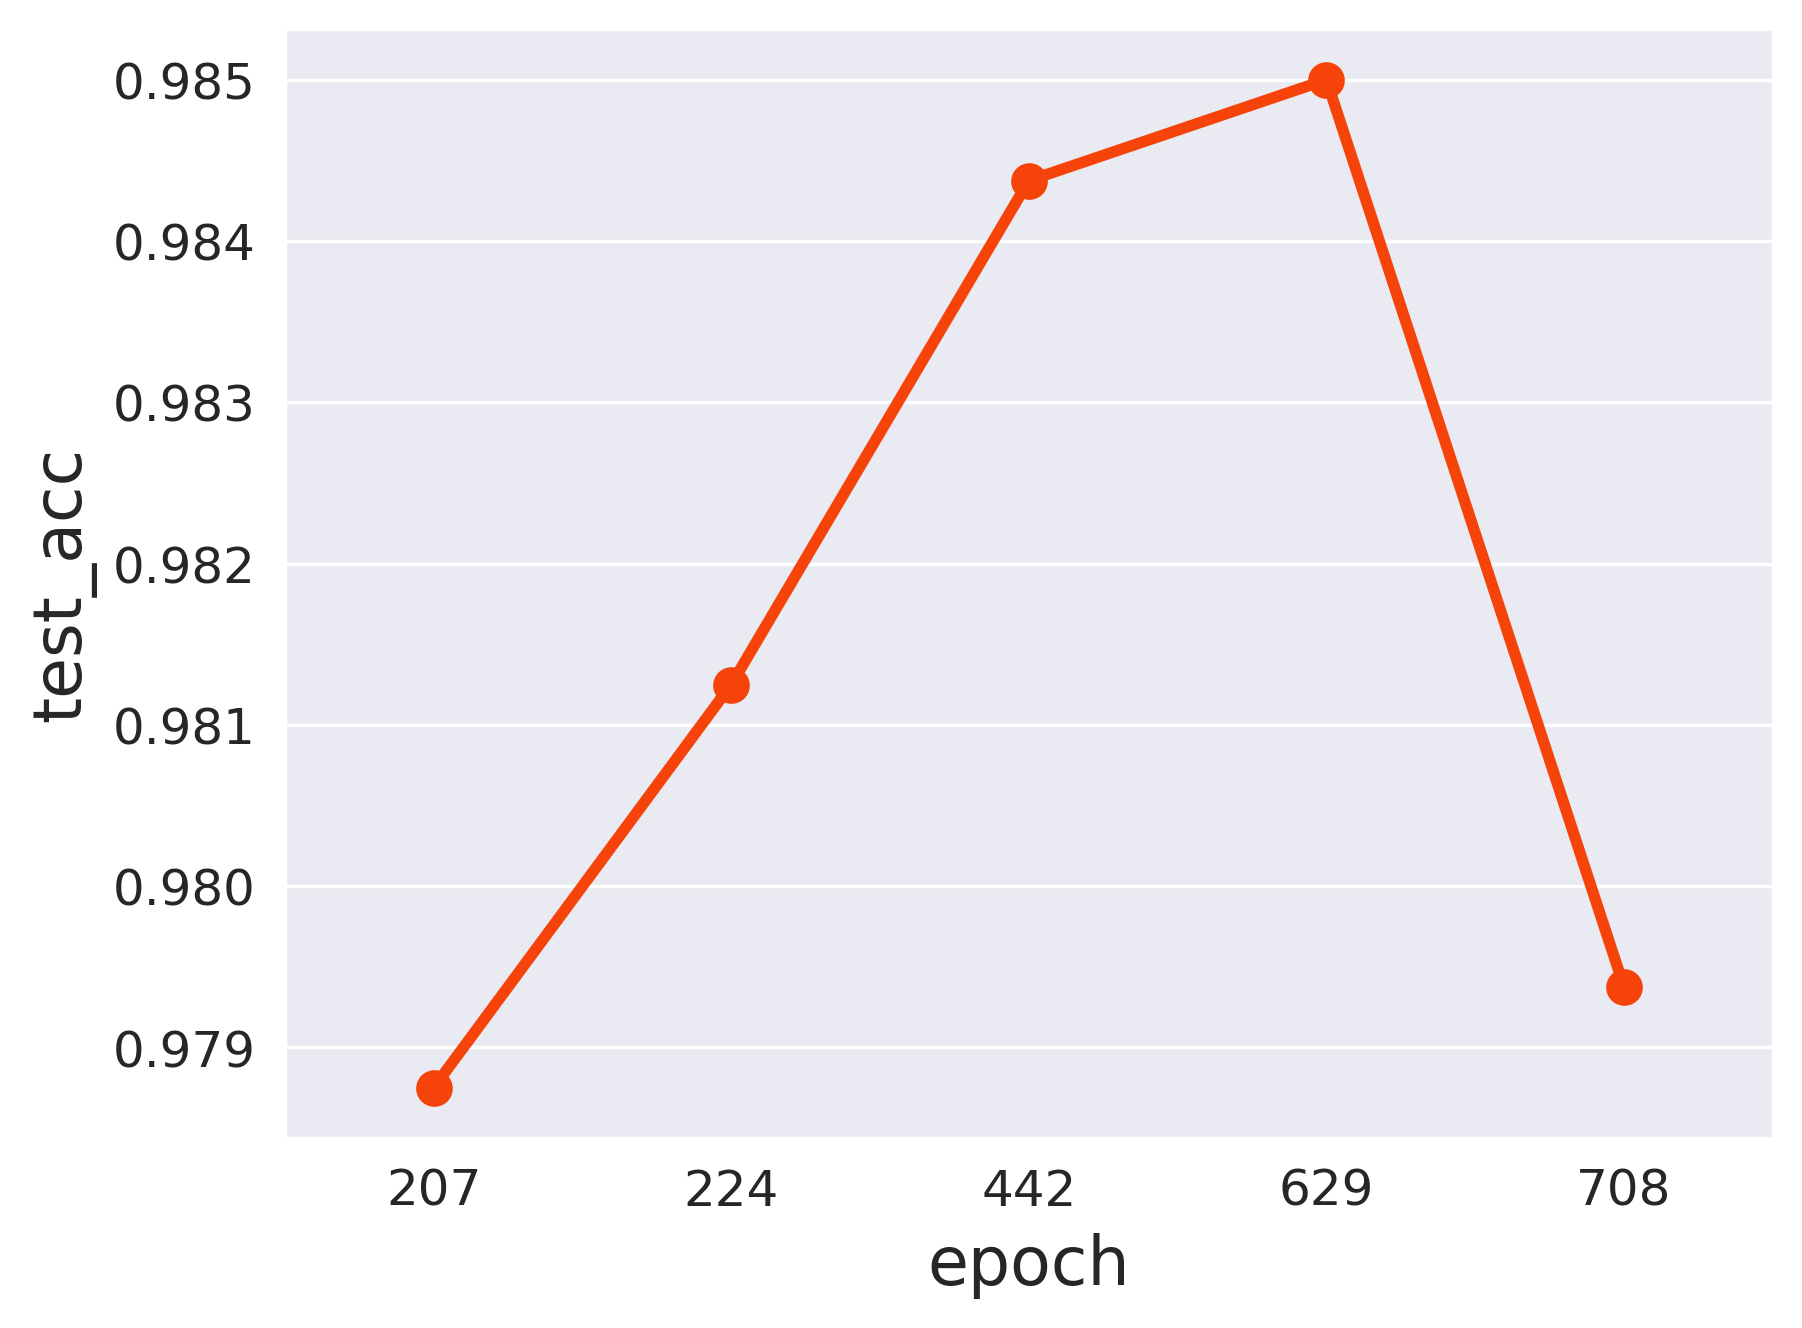

In [36]:
sns.pointplot(x="epoch", y="test_acc", data=df)